# <center>ADEME Project - Group A</center>

Group A: *BESSOT Quentin*, *DENNI Raphaël*, *PINHEIRO CRUZ Matthis*, *WOLFF Julien*

- [I. Context](#i.-context)
- [II. Objective of the Deliverable](#ii.-objective-of-the-deliverable)
- [III. Choice of Constraints](#iii.-choice-of-constraints)
- [IV. Bin Packing Problem](#iv.-bin-packing-problem)
- [V. Vehicule Routing Problem](#v.-vehicule-routing-problem)
- [VI. Statistics](#vi.-statistics)
- [Bibliography](#bibliography)
- [Additional ressources](#additional-ressources)

You can find all of our codes on [Github](https://github.com/deliverit-soft/deliverit).

## I. Context

The French Agency for Ecological Transition (ADEME) is seeking to experiment with new solutions to reduce greenhouse gas emissions.<br>

Our company, CesiCDP, specialized in this field, responded to a call from ADEME.<br>

Our company has decided to focus its study on delivery route management. The challenge of this mission is to find a series of routes that connects a set of cities while minimizing the total duration of the tours.<br>

To make the situation more realistic, we will add additional constraints such as each truck having a different starting point, different sizes, variable number of trucks, variable number of packages, and various packages sizes.<br>

To account for different deadlines and prepare all necessary reports, we have defined the following roadmap:<br>

- Formal modeling
- Algorithmic design and implementation
- Experimental study
- Presentation of the work to ADEME

---

## II. Objective of the Deliverable

In this deliverable, we will address the following points:<br>

- Formal reformulation of the problem
- Research on the complexity of the problem
- Formal representation of the data
- Defining the various constraints
- Problem modeling
- Describes resolution method
- Implementing your algorithm
- Implementing test cases
- A demonstration of our algorithm
- An experimental design

---

## III. Choice of Constraints

To make the situation more realistic, we will add several constraints. We have chosen the following constraints:<br>

- Each truck will have a different starting point.
- The size of the trucks.
- The number of trucks.
- The number of packages.
- The size of the packages.<br>

Our company has multiple warehouses, so our trucks will each have different starting points.<br>
We need to consider the number of trucks and the size of the various trucks that our company owns.<br>
We need to consider the number of packages that our trucks can carry and the size of the various packages.

---

## IV. Bin Packing Problem

One of the selected constraints of this project is to choose a number of packages that need to fit inside trucks. The packages and trucks have different size. If a truck is full, we add a new one and put the packages inside. It can be represented by a BPP (Bin Packing Problem)

We'll start by writing a state of the art, then continue on the decision problem and finish on the automatization problem.

### Definition
For $n$ a given number of packages of different size, the goal is to feat them in the minimum number of trucks.

### Complexity
Based on the document from https://www.lri.fr/~jcohen/documents/enseignement/binpacking.pdf, we can relate the knapsack problem to the bin-packing problem. To understand the complexity of bin-packing, we need to know the complexity of the knapsack problem. If we know the complexity of the knapsack problem, we can then determine the complexity of bin-packing since these two problems are closely related. According to the document from Wikiwand on the knapsack problem, the complexity of the knapsack problem is NP-hard. Therefore, in our case, we can approximate the complexity of the bin-packing problem as NP-hard as well.

### Decision Version

**Decision version :**

*Given:*

$n$ packages with sizes $s_1$,$s_2$,...,$s_n$. $ n\in \mathbf{R}$<br>
$A$ truck capacity $C$. $n\in \mathbf{R}$ <br>
$B$ the number of truck. $n\in \mathbf{R}$

*Question:*

What's the minimum B of trucks used such that the sum of the sizes of the packages in each truck does not exceed $C$ ?

### Formal statement
We can represent our problematic with a mathematical representation.

To represent the BPP, we can use Integer Linear Program written by Martello and Toth in 1990 :

\begin{equation*}
\begin{aligned}
    & \text{min} \sum_{i=1}^{u} y_i \\
    & \text{s.t.} \sum_{j=1}^{n} w_j x_{ij} \leq c y_i \quad (i = 1, \ldots, u), \\
    & \sum_{i=1}^{u} x_{ij} = 1 \quad (j = 1, \ldots, n), \\
    & y_i \in \{0, 1\} \quad (i = 1, \ldots, u), \\
    & x_{ij} \in \{0, 1\} \quad (i = 1, \ldots, u; j = 1, \ldots, n).
\end{aligned}
\end{equation*}

With $n$ the number of elements, $p$ the packages, $n$ the number of packages and $c$ the trucks.

### Algorithm
Since the problem is NP-Difficile, we cannot find an efficient algorithm, so we're planning to use a metaheuristic. We have chosen the First-Fit Decreasing which consist in the first place to sort in ascending order the packages and then to look if there is enough place in each truck to see if there is enough space, if not a new truck is created.

<pre>
for All objects i = 1, 2, . . . , n do 
    for All bins j = 1, 2, . . . do 
        if Object is in bin j then
            Pack object i in bin j.
            Break the loop and pack the next object.
        end if
    end for
    if Object i did not fit in any available bin then
        Create new bin and pack object i.
    end if
end for
</pre>

I've used this algorithm as a base for our algorithm, with several changes to insert it with the front and the statistical test.

<pre>
    Algorithm PlacePackagesInTruck(trucks, packages)

    Sort packages by volume in descending order
    Sort trucks by volume in ascending order

    Initialize PackageInFleet as an empty list
    Initialize TruckFleet as an empty list

    For each package in packages
        Initialize placed as False
        Get the shape of the current package

        While not placed
            For each truck in TruckFleet
                For each cell in the truck
                    If the package can fit in the current position and cells are empty
                        Place the package in the truck
                        Mark placed as True
                        Increment the package count in PackageInFleet for this truck
                        Break the loop if the package is placed
                If placed, break the loop

            If not placed and trucks is not empty
                For each truck type in trucks
                    If the truck has enough empty space for the package
                        Add the truck to TruckFleet
                        Initialize the package count for the truck in PackageInFleet
                        Break the loop once the truck is added

            If still not placed
                Mark placed as True (indicating failure to place the package)

    Return the number of trucks used, TruckFleet, total packages placed, and PackageInFleet
</pre>

---

## V. Vehicule Routing Problem

For this project, we need to deliver a variable number of packets from a strating point to several cities.
To solve this problem, we choosed the VRP (Vehicule Routing Problem), which is a generalization of the TSP problem applied to vehicules fleets that need to deliver packages.

### Definition

For a given number of $n$ points, the goal is to finds loops that pass through these points as such that the sum of their length is minimal. 
There can be many loops as needed, and all of them start from the same point.
With a minimal set of $n$, it is called the "Clover Leaf Problem", which consider clusters of points to solve the problem.

### Metaheuristic solution

Metaheuristics resolution are independent from the problem that they solve. They are generic and can be adapted. Another goal is to escpape from local optimal solution to find real better values.

### Decision and optimisation problem

#### Decision

Data : $n$ cities, $o$ trucks

Question : Is it possible to pass through each city just once?

#### Optimisation

Data : $n$ cities, $o$ trucks, $k$ loop length limit

Question : Is it possible to create as many loops as required without the sum of their lengths exceeding $k$?

## Mathematics modelisation

For the modelisation of the Vehicule Routing Problem, we can use the expression of C.-Y. Liong in his paper "Vehicle routing problem: Models and solutions"

\begin{align*}
    Min &\sum_{i \ne j} d_{ij} x_{ij}  \\
    &\sum_{j} x_{ij} = 1, \quad \forall i \in V,\\
    &\sum_{i} x_{ij} = 1, \quad \forall j \in V,\\
    &\sum_{i} x_{ij} \geq |S| - v(S), \quad \{S : S \subseteq V \setminus \{1\}, |S| \geq 2 \}, \\
    &x_{ij} \in \{0,1\}, \quad \forall \{i,j\} \in E; \; i \neq j
\end{align*}

### Variables :
$ d_{ij} $ Distance (or cost) of traveling from point 𝑖 to point j. <br>
$ x_{ij} $ Binary variable that is 1 if a vehicle travels from i to j, and 0 otherwise.

### Constraints
- $ \sum_{j} x_{ij} = 1, \quad \forall i \in V $ : For each customer i, there is exactly one trip leaving i to another point j.

- $ \sum_{i} x_{ij} = 1, \quad \forall i \in V $ : For each customer j, there is exactly one trip arriving from point i to j

- $ \sum_{i} x_{ij} \geq |S| - v(S), \quad \{S : S \subseteq V \setminus \{1\}, |S| \geq 2 $ : This constraint ensures that every subset of customers S is connected in a way that does not form separate subtours. v(S) represents the number of vehicles serving the subset S. This constraint is crucial to guarantee the global connectivity of the route and to prevent vehicles from moving in closed cycles without returning to the depot.

- $ x_{ij} \in \{0,1\}, \quad \forall \{i,j\} \in E; \; i \neq j $ : $ x_{ij} $ is a binary variable indicating whether a vehicle travels from i to j (1) or not (0). E is the set of edges (or possible routes) between points.

See the pseudo-code to code the metaheuristic of the taboo method : 

<pre>
    Import Libraries

Define Class VehiculeRoutingProblem
    Attributes: distance_matrix, num_vehicles, parcels_per_vehicle, start_points, num_locations, solution, best_solution, best_cost, num_parcels

    Constructor __init__
        Initialize attributes
        Set num_locations
        Initialize solution
        Set best_solution
        Evaluate initial solution cost

    Method _initialize_solution
        Create empty solutions
        For each vehicle
            Prompt user for drop-off cities
            Validate and add cities to route
            Complete route by returning to start point
        Return solutions

    Method evaluate
        Initialize total_distance
        For each route in solutions
            Compute route distance
        Return total_distance

    Method get_neighbors
        Initialize neighbors list
        For each vehicle's route
            Generate neighbors by swapping locations
        Return neighbors

Define Function tabu_search
    Initialize tabu_list, best_solution, best_cost
    For max_iterations
        Generate neighbors of current solution
        Evaluate and select best non-tabu neighbor
        Update best_solution and best_cost if better neighbor found
        Update current solution
        Add current solution to tabu_list
        Ensure tabu_list size <= tabu_tenure
    Return best_solution, best_cost

Define Function get_start_points
    Initialize start_points
    For each vehicle
        Prompt user for start point
        Validate input
        Add start point to list
    Return start_points

Main Execution Block
    Load distance matrix from CSV
    Convert to numpy array
    Display distance matrix
    Set parameters for trucks and parcels
    Get start points from user
    Initialize VRP
    Run tabu_search
    Measure and display execution time
    Display best solution, cost, and number of parcels per vehicle

</pre>

---

## VI. Statistics

### Tabu search

Experiment plan :

For each instance, we generate a solution by setting the maximal size of the tabu list and the number of iterations of the algorithm.
The variation for the size goes by 50, 100, 200, 500 and 1000, and the iterations 100 and 1000. 
For this experiment, we have a matrix containing 3000 cities with their distances.

#### Tabu search cost by time

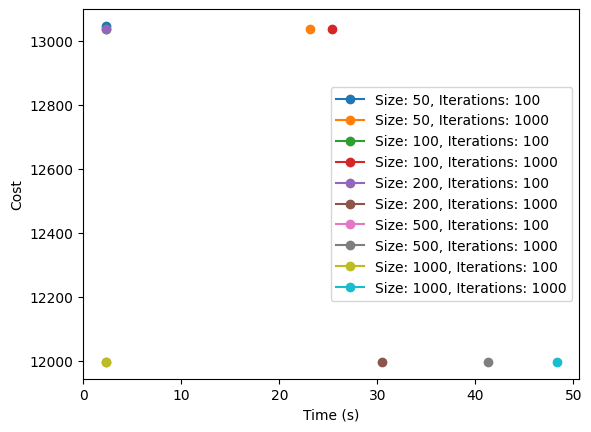

Interpretation :

As we can see, there are two zones of repartition. We can have a low cost, but it will take time, and vice versa. 
It will be useful to our work by helping us to balance between these two considerations, which are time and cost.
We have one instance, the yellowish one, with a size of 1000 and 100 iterations and it has a low cost and time. 
It certainly is an anomaly because it is quite unusual to have this situation, especially with what we observe with the other results.

### Bin Packing

Experiment plan :

For each instance, we generate a solution by setting the maximal number of trucks and packages.
The maximal number of trucks goes by 50, 100, 200, 500 and 1000, and the packages 100 and 1000.
Each truck is randomly generated and have a minimum size of 2 and a maximal one of 10.
Each package is randomly generated and have a minimum size of 1 and a maximal one of 5.

#### Number of used trucks by time
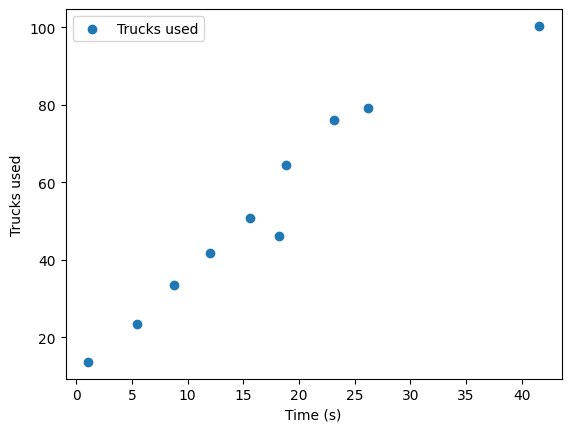

Interpretation :

The number of trucks used and the time it takes to calculate the value is quite linear, with a little anomaly. 
This result is expected. 
We will certainly need to optimize our algorithm to reduce the calculation time for bigger instances.

#### Number of placed packages by time
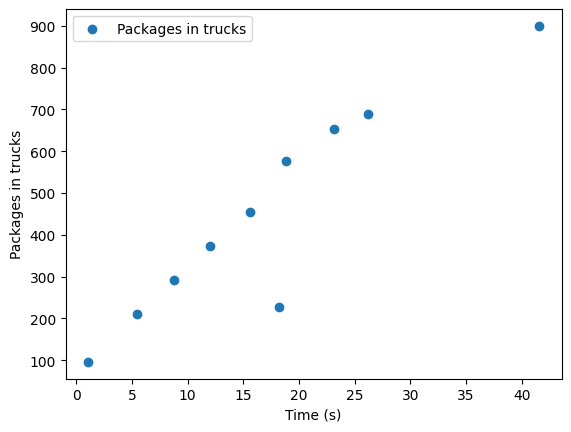

Interpretation :

The number of placed packages and the time it takes to calculate the value is quite linear, with a little anomaly. 
This result is expected. 
We will certainly need to optimize our algorithm to reduce the calculation time for bigger instances.

---

## Bibliography :
- Chazelle. (1983). The bottomn-left bin-packing heuristic: An efficient implementation. IEEE Transactions on Computers, 100(8), 697-707.
- Ekici, A. (2021). Bin packing problem with conflicts and item fragmentation. Computers & Operations Research, 126, 105113.
- Zirour, M. (2008). Vehicle routing problem: models and solutions. Journal of Quality Measurement and Analysis JQMA, 4(1), 205-218.
- El Hayek, J. (2006). Le problème de bin-packing en deux-dimensions, le cas non-orienté: résolution approchée et bornes inférieures (Doctoral dissertation, Université de Technologie de Compiègne).
- DANTZIG, G. B., [The Truck Dispatching Problem](https://raw.githubusercontent.com/aishfenton/thesis/master/papers/The%20Truck%20Dispatching%20Problem.pdf) [[archive](https://web.archive.org/web/20220120143840/https://raw.githubusercontent.com/aishfenton/thesis/master/papers/The%20Truck%20Dispatching%20Problem.pdf)], 1959
- LABADIE, N., [Metaheuristics for Vehicule Routing Problems](https://books.google.fr/books?id=sDXvCQAAQBAJ&printsec=frontcover&redir_esc=y#v=onepage&q&f=false), 2016

## Additional ressources
- Problème du sac à dos, Wikiland
- Cohen J. Le problème du Bin Packing (remplissage de sacs)
- Goodrich, Bin Packing